<a href="https://colab.research.google.com/github/sherlockieee/cs113/blob/main/Problem_set_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1. Inbox (#Probability)

Assume that emails arrive in someone’s inbox following a Poisson process. The average rate at
which emails arrive is 30 per hour.

### Question 1
Determine the probability that the 5th email arrives after 12 minutes.
Hint: You don’t need Calculus.



In [2]:
"""
Explanation:


Let X: No of emails received in 12 minutes
=> Lambda = 30 * 12 / 60 = 6
This is because average rate of email arrival is 30 emails/ 60 mins
= 6 emails/ 12 minutes
because lambda is the mean number of event in which individual events
happen at random and independently => can scale up and down depending on 
time interval
X ~ Poisson(lambda = 6)

The 5th email arrives after 12 minutes
=> within the first 12 minutes, there are at most 4 emails
=> We need to find P(X <= 4)
"""
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from scipy.stats import poisson

dist = poisson(6)
answer = dist.pmf(0) + dist.pmf(1) + dist.pmf(2) + dist.pmf(3) + dist.pmf(4)

print(answer)


0.2850565003166312


### Question 2
Test your answer to (1.) using a short simulation.


In [3]:
"""
This simulation makes use of the Exponential distribution
because we know that if X follows a Poisson distribution lamdba
for the number of occurences in Y minute, then the time
between successive occurrence will follow an exponential distribution
Y/lambda minutes.

"""
import numpy as np
from scipy.stats import expon

# Define the email arrival rate (emails per minute)
lambda_ = 0.5

# Define the number of simulations to run
num_simulations = 10000

# Define the number of emails we're interested in (the 5th email)
num_emails = 5

# Define the time window we're interested in (12 minutes)
time_window = 12
count = 0

for i in range(num_simulations):
    arrivals = expon(scale=1/lambda_).rvs(size=num_emails)
    #since exponential is interval time, we need to sum it to find the arrival time of the 5th mail
    arrival_of_5th_email = sum(arrivals)
    if arrival_of_5th_email > time_window:
        count += 1

    

# Calculate the probability of simulations where the 5th email arrives after 12 minutes
probability = count / num_simulations

# Print the results
print("Probability that the 5th email arrives after 12 minutes:", probability)


Probability that the 5th email arrives after 12 minutes: 0.2809


## Problem 2. Closing time (#Probability)
A bank is about to close but the final 2 customers are still being served. Customer 1 is being
helped by Teller 1 who takes $Expo(\lambda_1)$time to serve a customer. Customer 2 is being helped
by Teller 2 who takes $Expo(\lambda_2)$ time to serve a customer.
The bank can only be closed after both customers have been served. Let $X$ be the amount of
time we have to wait before the bank can be closed.

### Question 1
Find the PDF, mean, and variance of $X$. Show all your work.


In [4]:
"""
Let the time by Teller 1 be T1 ~ Expo(𝜆1)
=> PDF(T1) = 𝜆1e^(-𝜆1x) 
Let the time by Teller 2 be T2 ~ Expo(𝜆2)
=> PDF(T2) = 𝜆2e^(-𝜆2x) 

X = max(T1, T2)

P(X <= x) 
= P(max(T1, T2) <= x)
= P(X<= x & Y<= x)
= integral(integral(𝜆1e^(-𝜆1x) *𝜆2e^(-𝜆2x))(dx, 0, t))(dy, 0, t)

This is the CDF of X.
To find PDF, we need to differentiate this value by dx.

From then, we can find the mean
E(X) = integral(x * pdf(x))(dx, 0, inf)

And the variance
Var(X) = integral(x^2 * pdf(x))(dx, 0, inf) - [E(X)]^2
"""
from sympy import *
from sympy.abc import x
l1 = Symbol('𝜆1')
T1 = Symbol('T1')

l2 = Symbol('𝜆2')
T2 = Symbol('T2')

#getting the expression
expr = l1 * exp(-l1 * T1) * l2 * exp(-l2 * T2)
#CDF  integrating both value to x
cdf = integrate(expr, (T1, 0, x), (T2, 0, x))

#PDF = differentiating CDF by X
pdf = cdf.diff(x)

#Mean = integral(x * f(x)) for x from 0 to infinity
mean = integrate(pdf * x, (x, 0, oo))

#Var = E(X^2) - E(X)^2
variance = integrate(pdf * x**2, (x, 0, oo)) - mean**2



### Question 2
Implement a simulation to check your answers for the PDF, mean, and variance of $X$.

In [5]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

# Define the rate of service
lambda1 = 0.5
lambda2 = 0.3

# Define the number of simulations to run
trials = 100000

# Create an array for storage
X_sim = np.zeros(trials)

for i in range(trials):
    # Get a random time for T1 and T2 based on the exponential function
    T1 = expon.rvs(scale=1/lambda1)
    T2 = expon.rvs(scale=1/lambda2)
    # Get the X value based on the maximum value
    X_sim[i] = max(T1, T2)

# Get the mean and variance
mean_sim = np.mean(X_sim)
var_sim = np.var(X_sim)


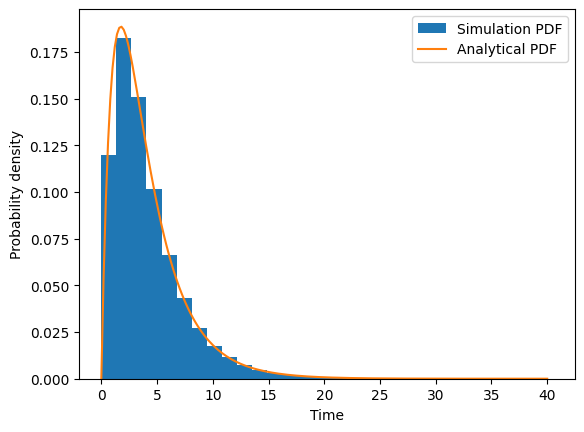

Analytical Mean: 4.083
Simulated Mean: 4.101
Analytical Variance: 10.424
Simulated Variance: 10.546


In [34]:
#Getting analytical value for the PDF
X = np.linspace(0, 40, 200)
y = [pdf.subs({l1: lambda1, l2: lambda2, x: x_val}) for x_val in X]

#Plotting PDF diagram
plt.hist(X_sim, bins=30, density=True, label="Simulation PDF")
plt.plot(X, y, label="Analytical PDF")
plt.ylabel("Probability density")
plt.xlabel("Time")
plt.legend()

plt.show()

#Getting analytical vs simulated mean
print('Analytical Mean: {:.3f}'.format(mean.subs({l1: lambda1, l2: lambda2})))
print('Simulated Mean: {:.3f}'.format(mean_sim))
print('Analytical Variance: {:.3f}'.format(variance.subs({l1: lambda1, l2: lambda2})))
print('Simulated Variance: {:.3f}'.format(var_sim))


##Problem 3. Radioactive decay (#ParameterEstimation)
Radioactive particles are emitted from a source and decay independently at a random distance
from the source. Based on the physics of this experiment, we assume $X 
\sim Expo(\lambda)$ but
we don’t know the value of the average rate of particle decay $\lambda$.


Based on prior knowledge, we know $\lambda$ is greater than 0.01 particles per cm and less than 1 particle per cm but we don’t know anything more than that.


After running the experiment, the following data (distance measurements in cm) are reported: $\{x_i\}=\{1.3, 2.3, 3.9, 6.1, 6.2, 6.5\}$.


Use Bayesian parameter estimation to estimate the value of $\lambda$. Show your work and motivate
your answers.

### Question 1
Provide your best estimate for $\lambda$ and motivate in what sense this is the “best” estimate.



Posterior mean: 0.266 particles per cm


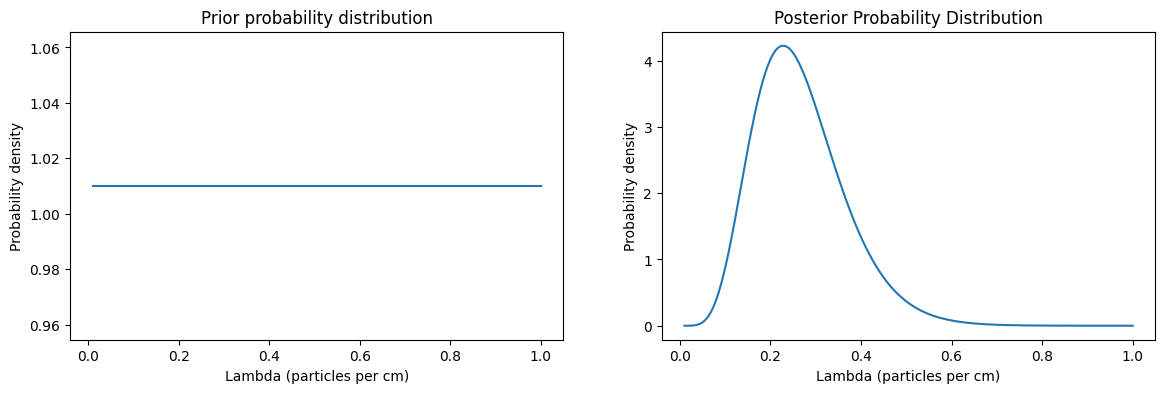

In [7]:
"""
Bayesian inference:
Posterior probability = Prior * likelihood/ marginal likelihood

For prior, we are assuming an uniform distribution between 0 and 0.01
so the PDF is 1/(1 - 0.01)


For likelihood, since decay events are independent and
lambda follows exponential distribution
=> for x_i, f(x_i | lambda) = lambda * e^(-lambda * x_i)
=> For all x_i, we need to get the product of all these functions

For marginal likelihood f(x), we need to compute the probability x
for all values of lambda
= integral(prior * likelihood)
"""
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Define the prior probability distribution
def prior(lam):
    return 1/(1 - 0.01) if 0.01 <= lam <= 1 else 0

# Define the likelihood function
def likelihood(lam, data):
    return np.prod(lam * np.exp(-lam * data))

# Define the marginal likelihood
def marginal_likelihood(lam, data):
    # quad is the integral function in scipy that computes a definite integral
    return quad(lambda lam: likelihood(lam, data) * prior(lam), 0.01, 1)[0]

# Define the posterior
def posterior(lam, data):
    return likelihood(lam, data) * prior(lam) / marginal_likelihood(lam, data)



# Define the function to calculate the posterior mean
def posterior_mean(data):
    #mean = integral of x * f(x) 
    return quad(lambda lam: lam * posterior(lam, data), 0.01, 1)[0]

# Define the data set
data = np.array([1.3, 2.3, 3.9, 6.1, 6.2, 6.5])

# Calculate the posterior mean
post_mean = posterior_mean(data)
print(f"Posterior mean: {post_mean:.3f} particles per cm")

# Plot the posterior probability distribution
lams = np.linspace(0.01, 1, 1000)
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)

# Plotting the prior distribution of lambda
plt.plot(lams, [prior(lam) for lam in lams])
plt.title('Prior probability distribution')
plt.xlabel('Lambda (particles per cm)')
plt.ylabel("Probability density")

plt.subplot(1, 2, 2)

#Plotting the posterior distribution of lambda
post_probs = [posterior(lam, data) for lam in lams]
plt.plot(lams, post_probs)
plt.xlabel("Lambda (particles per cm)")
plt.ylabel("Probability density")
plt.title("Posterior Probability Distribution")
plt.show()


### Question 2
Provide a 99% credible interval $\lambda$ for the estimated value of $\lambda$.



In [32]:
"""
To find the 99% credible interval lambda
Ideally, we would integrate the posterior function
to get the CDF
Then find the upperbound of lambda such that CDF = 0.005
and CDF = 0.995 respectively 
(since this represents the upper and lower limits)

However, since numpy doesn't support solving for integral
I am using the estimation method which find the CDF for 
different values of lambda. 

We increment (or decrement) the value by 0.01
each time and then find its respective CDF.
And we continue doing so until we find the first value
that has CDF of 0.005

And vice versa to find CDF value of 0.995
"""
from scipy.stats import norm

# Define the cumulative distribution function of the posterior probability density function
def posterior_cdf(lam, data):
    integrand = lambda x: posterior(x, data)
    return quad(integrand, 0.01, lam)[0]

# Find the lower bound 
lower = 0.01
while posterior_cdf(lower, data) < 0.005:
    lower += 0.001

# Find the upper bound 
upper = 1
while posterior_cdf(upper, data) > 0.995:
    upper -= 0.001

print(f"99% credible interval: ({lower:.3f}, {upper:.3f}) particles per cm")



99% credible interval: (0.078, 0.595) particles per cm


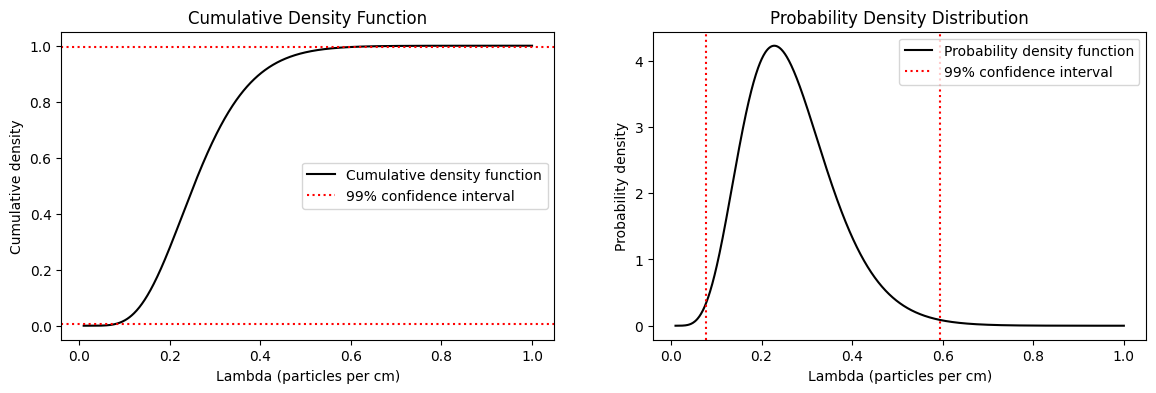

In [37]:
# Plotting the CDF function with the lower and upper bound
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
cdf_probs = np.cumsum(post_probs)/ np.cumsum(post_probs)[-1]
plt.plot(lams, cdf_probs, color='black',label="Cumulative density function")
plt.axhline(y=0.005, color='red', ls=':',  label="99% confidence interval")
plt.axhline(y=0.995, color='red', ls=':')
plt.xlabel("Lambda (particles per cm)")
plt.ylabel("Cumulative density")
plt.title("Cumulative Density Function")
plt.legend()

# Plotting the PDF function with the lower and upper bound
plt.subplot(1, 2, 2)
plt.plot(lams, post_probs, color='black', label="Probability density function")
plt.axvline(x=lower, color='red', ls=':',  label="99% confidence interval")
plt.axvline(x=upper, color='red', ls=':')
plt.xlabel("Lambda (particles per cm)")
plt.ylabel("Probability density")
plt.title("Probability Density Distribution")
plt.legend()
plt.show()


Resources I have used in this assignment:
- For the Bayesian parameter estimation formula https://towardsdatascience.com/maximum-likelihood-vs-bayesian-estimation-dd2eb4dfda8a
- For plotting code: https://forum.minerva.edu/app/courses/2596/sections/10229/classes/72739
- I have not used AI tool in this assignment. 